# Ride Sharing Project

# Project description

Zuber is a new ride-sharing company that's launching in Chicago. Our task is to find patterns in the available information. We want to understand passenger preferences and the impact of external factors on rides.

Working with a database, we'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

# Description of the data

/datasets/project_sql_result_01.csv. It contains the following data:

* company_name:  taxi company name

* trips_amount:  the number of rides for each taxi company on November 15-16, 2017.

/datasets/project_sql_result_04.csv. It contains the following data:

* dropoff_location_name:  Chicago neighborhoods where rides ended

* average_trips:  the average number of rides that ended in each neighborhood in November 2017.

For these two datasets you now need to

* import the files
* study the data they contain
* make sure the data types are correct
* identify the top 10 neighborhoods in terms of drop-offs
* make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
* draw conclusions based on each graph and explain the results

/datasets/project_sql_result_07.csv — It contains data on rides from the Loop to O'Hare International Airport. These are the table's field values:

* start_ts: pickup date and time

* weather_conditions: weather conditions at the moment the ride started

* duration_seconds: ride duration in seconds

# Open the data file and study the general information

# Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math as mt
import functools
import seaborn as sns
from scipy import stats as st
from datetime import datetime
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

# Load data

In [2]:
try:
    company_tripsam = pd.read_csv('/datasets/project_sql_result_01.csv')
    dropoff_tripavg = pd.read_csv('/datasets/project_sql_result_04.csv')
    testing_hyp = pd.read_csv('/datasets/project_sql_result_07.csv')
    
except:
    company_tripsam = pd.read_csv('project_sql_result_01.csv')
    dropoff_tripavg = pd.read_csv('project_sql_result_04.csv')
    testing_hyp = pd.read_csv('project_sql_result_07.csv')

# Study the Initial Data

We'll take a look at the data in 'company_tripsam'

In [3]:
company_tripsam #previewing the dataset

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
company_tripsam.isnull().sum() #looking for null values and adding them up

company_name    0
trips_amount    0
dtype: int64

In [5]:
company_tripsam.duplicated().sum()  #searching for duplicate rows

0

Looks like there are no missing values in 'company_tripsam'and no duplicates either.

Lets check the datatypes in 'company_tripsam'

In [6]:
company_tripsam.info(verbose=True, null_counts=True) #looking at general information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


/tmp/ipykernel_366/2596118624.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  company_tripsam.info(verbose=True, null_counts=True) #looking at general information about dataset


The datatypes seem appropriate.

Now we'll do the same with 'dropoff_tripavg'. First we'll study the data.

In [7]:
dropoff_tripavg #previewing the dataset

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


Lets check for missing values.

In [8]:
dropoff_tripavg.isnull().sum() #searching for null values

dropoff_location_name    0
average_trips            0
dtype: int64

There are no missing values in 'dropoff_tripavg'.

In [9]:
dropoff_tripavg.info(verbose=True, null_counts=True) #looking at general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


/tmp/ipykernel_366/1141138707.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  dropoff_tripavg.info(verbose=True, null_counts=True) #looking at general information about the dataset


The datatypes look mostly appropriate, however, we might be able to change the datatype for the 'average_trips' column from float to integer to make the data look cleaner. 

Next we'll take a look at the 'testing_hyp' table from our results in SQL.

In [10]:
testing_hyp #previewing the dataset

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [11]:
testing_hyp.isnull().sum() #searching for null values

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [12]:
testing_hyp.info(verbose=True, null_counts=True) #looking at general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


/tmp/ipykernel_366/1218584532.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  testing_hyp.info(verbose=True, null_counts=True) #looking at general information about the dataset


There are no missing values. We might just change the 'duration_seconds' column from float to integer to make it look cleaner. And we'll change the 'start_ts' column to a datetime datatype. 

# Data Preprocessing

First we'll change the 'average_trips' column from the dropoff_tripavg dataset from float to integer.

In [13]:
dropoff_tripavg['average_trips']= dropoff_tripavg['average_trips'].astype('int') #changing the datatype to 'int'

In [14]:
dropoff_tripavg.info() #double checking if datatype change worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


Now the 'average_trips' column is in the integer datatype.

Next we'll change the 'duration_seconds' column in the 'testing_hyp' table from float to integer. 

In [15]:
testing_hyp['duration_seconds']= testing_hyp['duration_seconds'].astype('int') #changing the datatype to 'int'

In [16]:
testing_hyp['start_ts'] = pd.to_datetime(testing_hyp['start_ts']) #changing the datatype to 'datetime'

In [17]:
testing_hyp.info() #checking to see if the datatype changes worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


Now the 'start_ts' column is in a datetime datatype, and the 'duration_seconds' column is in the integer datatype.

# Exploratory Data Analysis

Now we'll identify the top 10 neighborhoods in terms of dropoffs. 

In [18]:
top10_dropoffs= dropoff_tripavg.sort_values(by= ['average_trips'],ascending= False).head(10)
#sorting the dataset by 'average_trips' in descending order
top10_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


Next we'll graph the data in 'top10_dropoffs'.

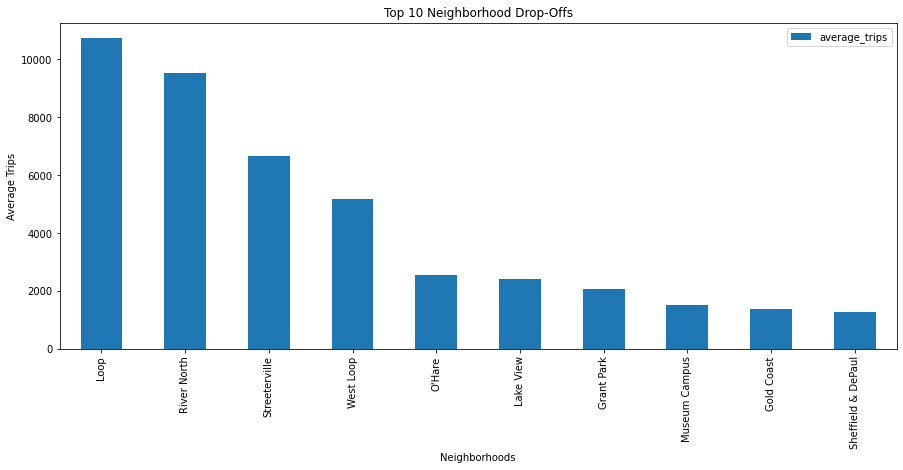

In [19]:
top10_dropoffs.plot(kind= 'bar', figsize= (15, 6), x= 'dropoff_location_name')
#plotting a bar graph, setting the size, title
plt.title('Top 10 Neighborhood Drop-Offs')
plt.ylabel('Average Trips')
plt.xlabel('Neighborhoods')
#labelling x and y axis
plt.show()

Here we can see that the greater Loop area in Chicago is the most high traffic area.

Next we'll do the same for the 'company_tripsam' table. First we'll take a look at the Top 10 companies with the most average trips. 

In [20]:
top10_companies= company_tripsam.sort_values(by= ['trips_amount'],ascending= False).head(10)
#filtering dataset to show top 10 cab companies
top10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Next we'll graph the data in 'top10_companies'.

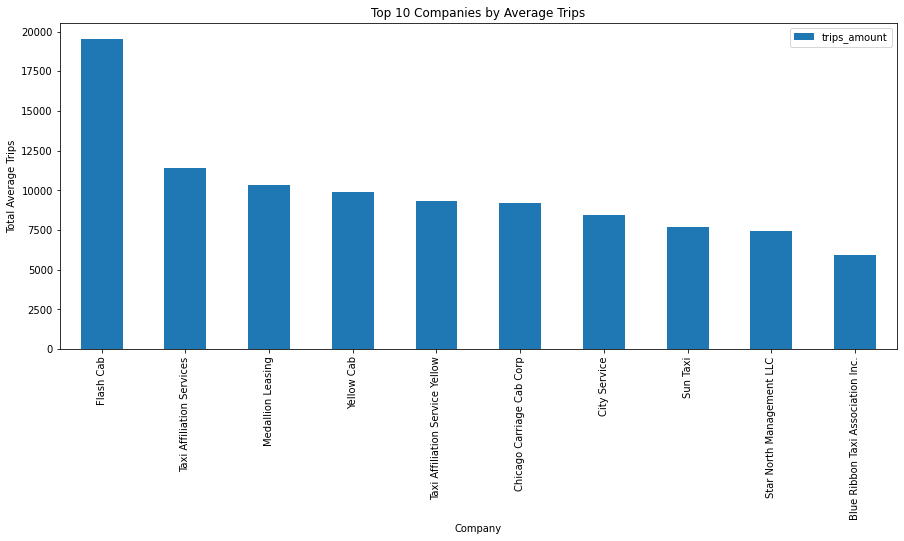

In [21]:
top10_companies.plot(kind= 'bar', figsize= (15, 6), x= 'company_name')
#plotting a bar graph, setting the size, and title name
plt.title('Top 10 Companies by Average Trips')
plt.ylabel('Total Average Trips')
plt.xlabel('Company')
#labelling x and y axis
plt.show()

Accoring to the graph above, the company 'Flash Cab' is the most popular cab company.

Based on the most popular drop-off areas, we can see on the map below that most of the popular areas are clustered together in Chicago. It would make sense to deploy a Zuber fleet near and around these areas. The airport is the only area a little further out, but it is also technically a high traffic area. 

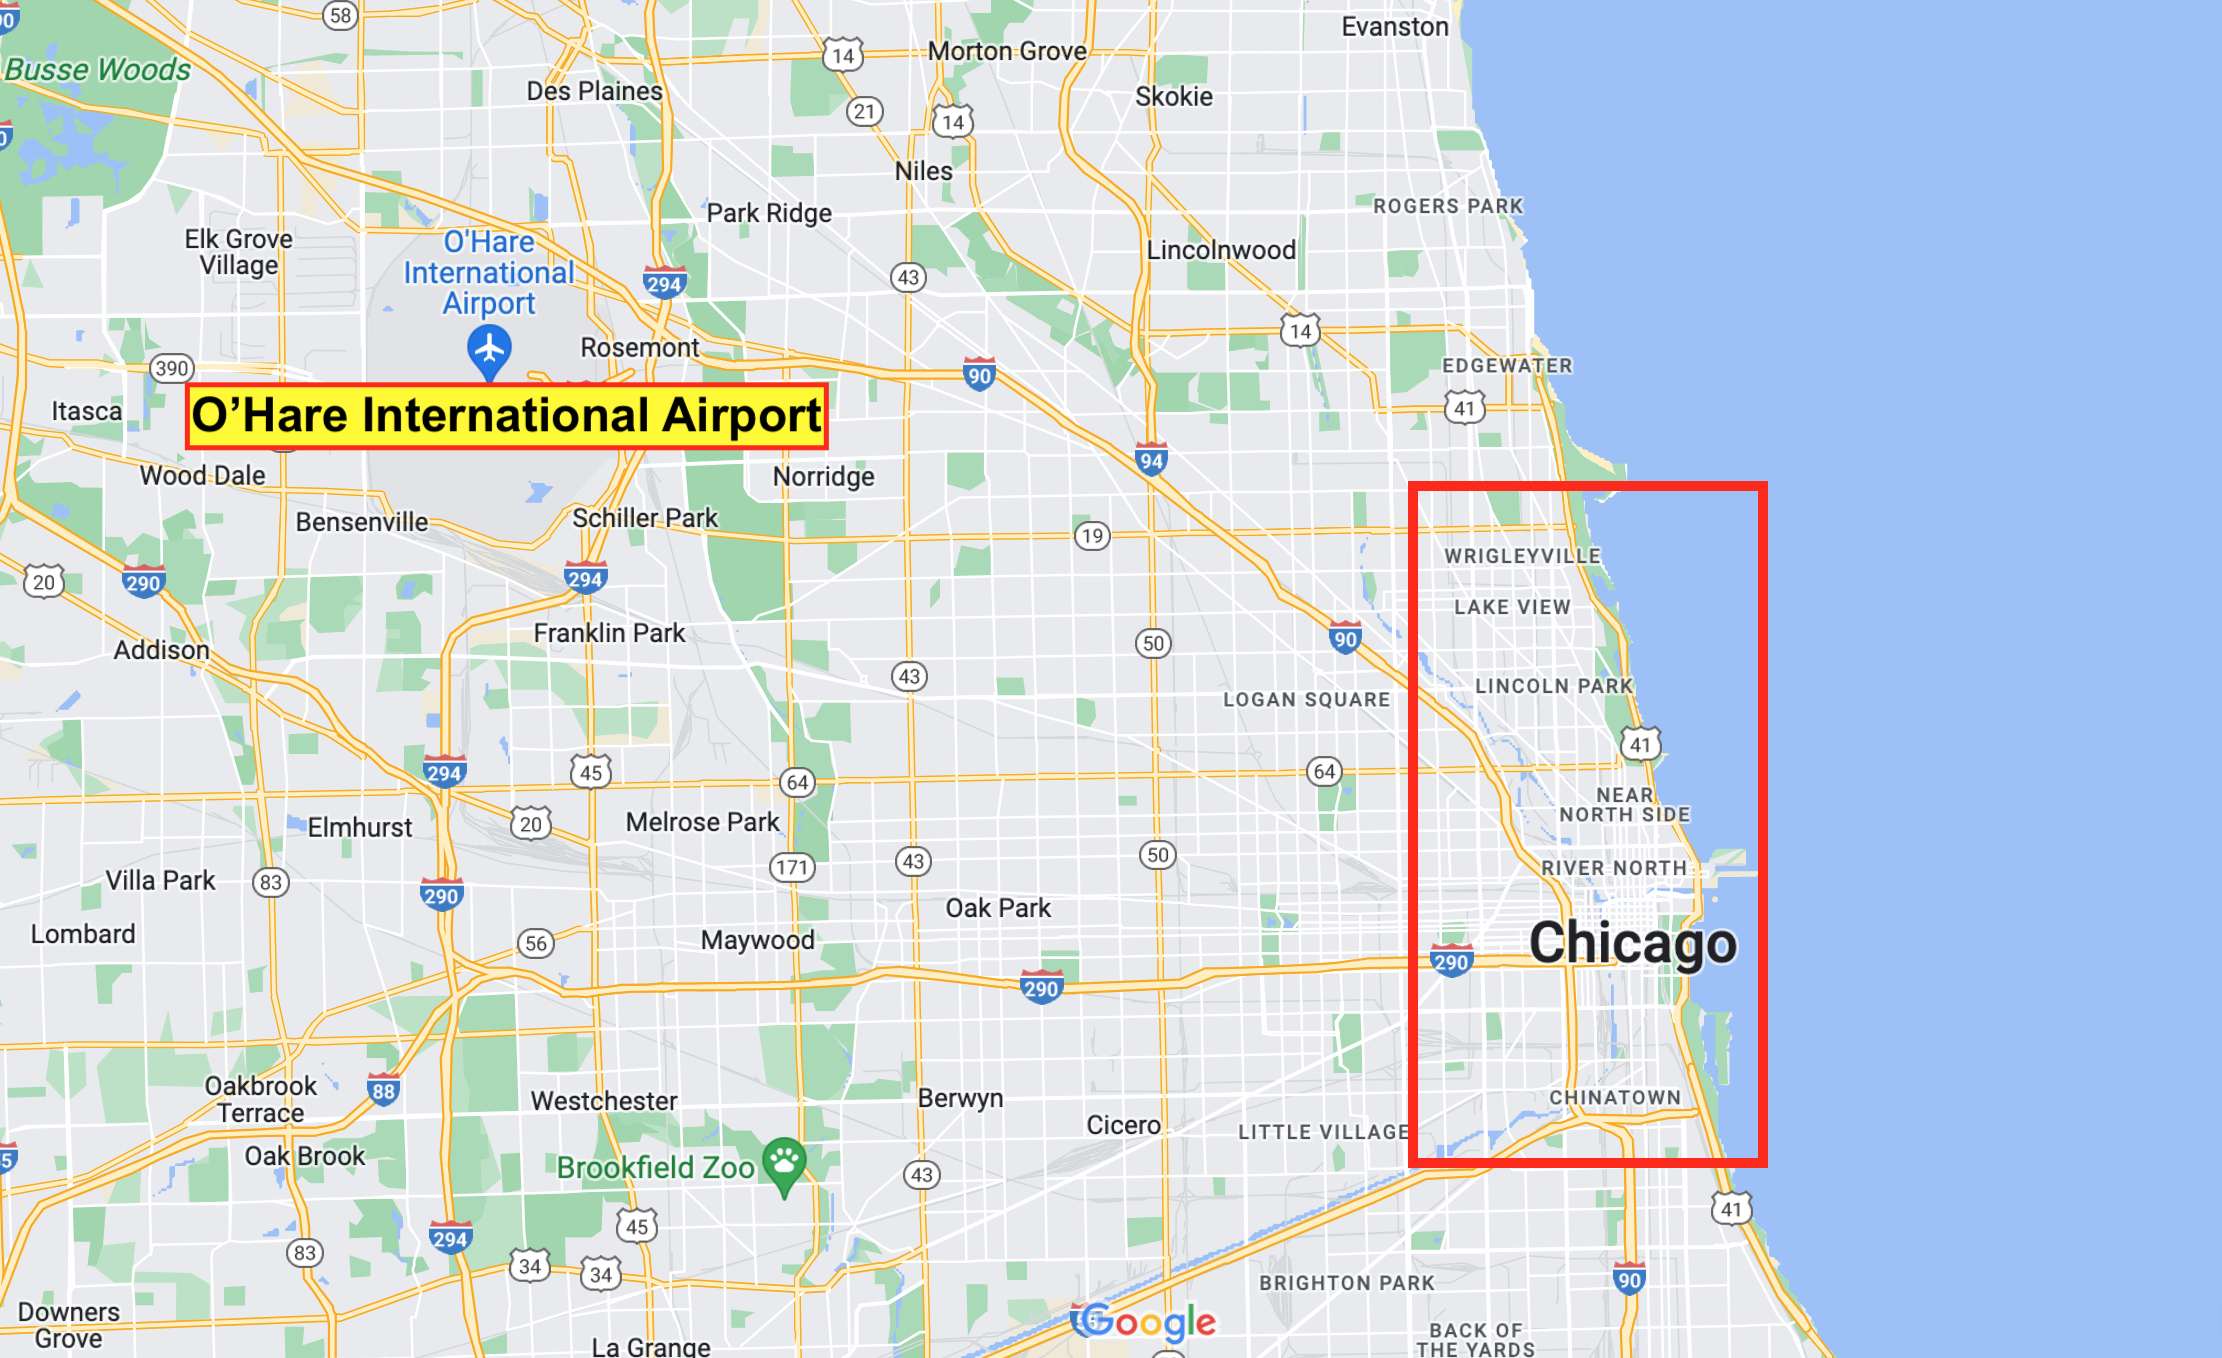

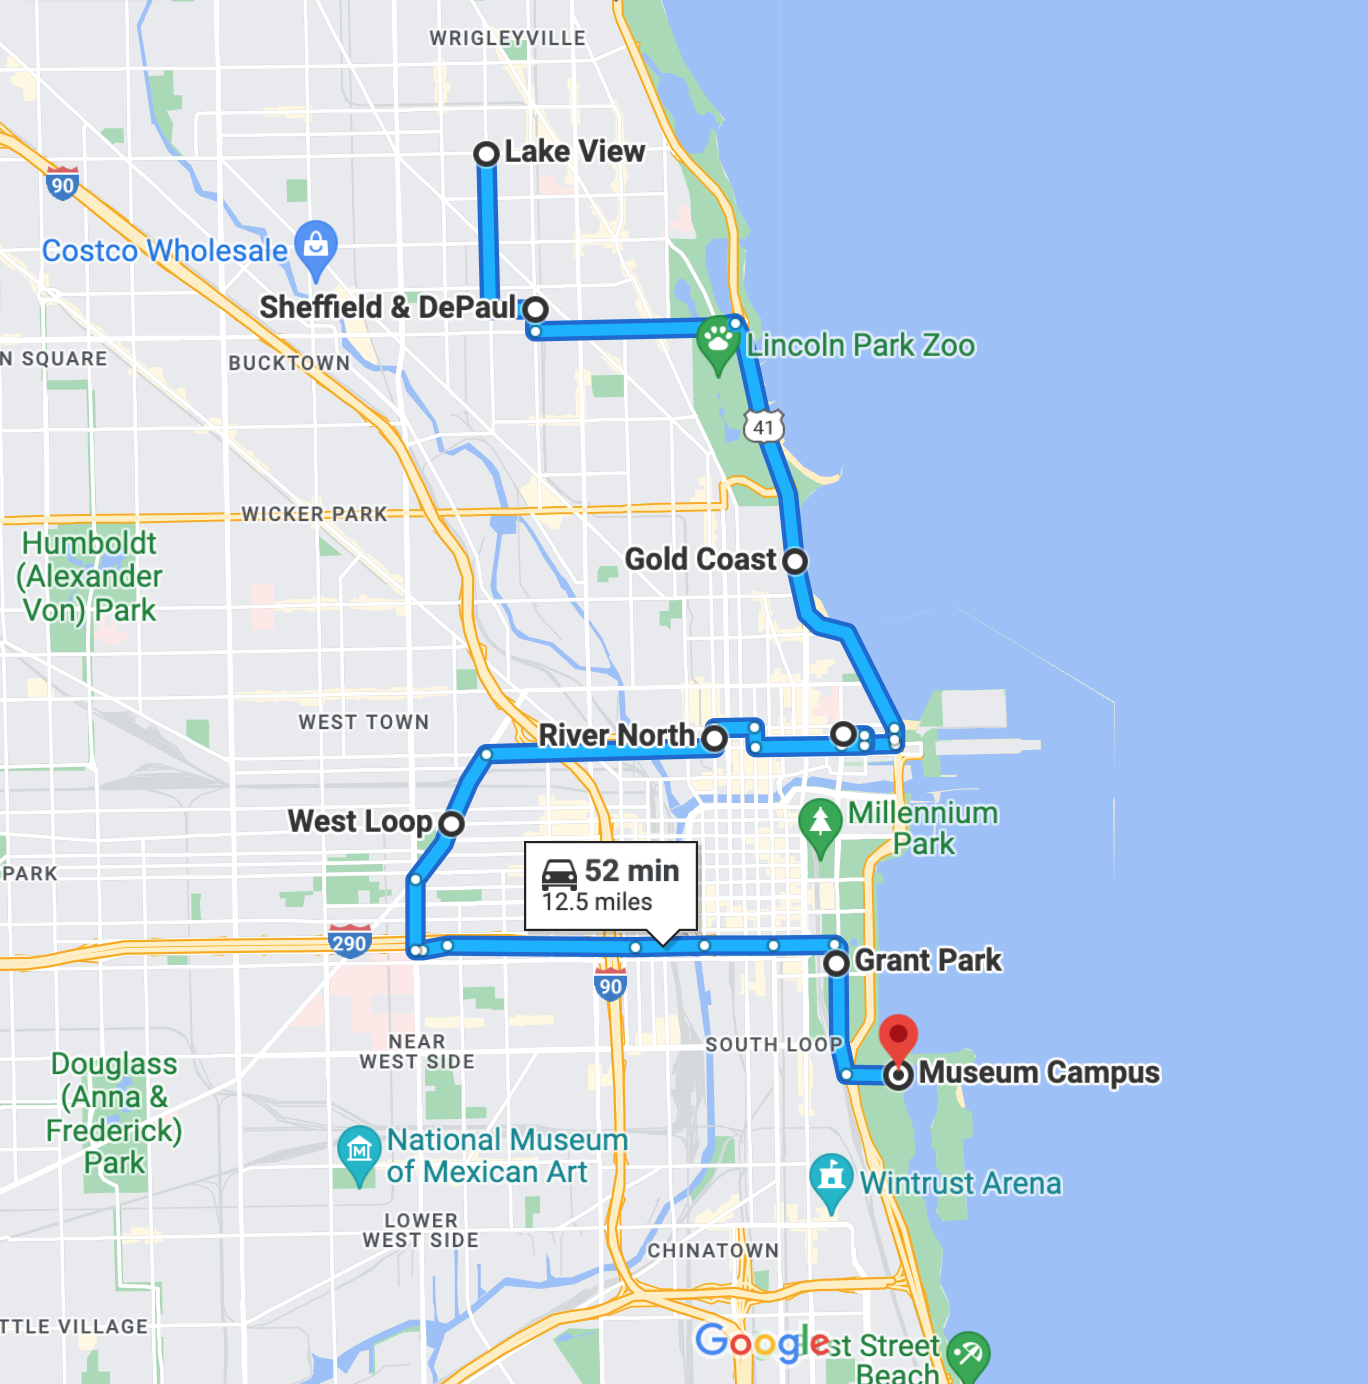

# Testing the Hypothesis

The Hypothesis is:  "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [22]:
testing_hyp

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318
1065,2017-11-11 13:00:00,Good,2100
1066,2017-11-11 08:00:00,Good,1380


Lets take a look at the number of 'Good' versus 'Bad' weather conditions. 

In [23]:
filtered_good_days = testing_hyp.query('weather_conditions== "Good"')
total_good_days = len(filtered_good_days)
total_good_days

888

In [24]:
filtered_bad_days = testing_hyp.query('weather_conditions== "Bad"')
total_bad_days = len(filtered_bad_days)
total_bad_days

180

So it looks like there are an overwhelming number of 'Good' days compared to 'Bad' days. Now we'll test the hypothesis.

<b>Null Hypothesis:</b> <a class="tocSkip"></a>The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays are the same.
    
<b>Alternate Hypothesis:</b> <a class="tocSkip"></a> The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


We will set alpha at 0.05 to allow 5% of risk that there is no difference, and then we'll do an independent t-test between the Good days and the Bad days.

In [25]:
good_days_secs = filtered_good_days['duration_seconds']
#filtering the dataset to only show Good days
bad_days_secs = filtered_bad_days['duration_seconds']
#filtering the dataset to only show Bad days

In [26]:
#testing the Null Hypothesis
alpha = 0.05 

results = st.ttest_ind(good_days_secs, bad_days_secs)

print('p-value:', results.pvalue)

if results.pvalue < alpha: 
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.517970327099473e-12
We reject the null hypothesis


Result: We see that the average duration on Good days and Bad days are different. So we reject the null hypothesis. 

Now we'll test the Alternate Hypothesis.

In [27]:
#testing the Alternate Hypothesis
alpha = .05 
                        
results = st.ttest_ind(good_days_secs, bad_days_secs, equal_var=False, alternative='greater')

print('p-value: ', results.pvalue)

if (results.pvalue > alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  0.9999999999966305
We reject the null hypothesis


Result: We see that the probability of the Alternate Hypothesis is True. The Average duration on Good days and Bad days are different.

# Conclusion

We were able to take a look at the first two datasets. The first dataset showing Total Trips per Company Name. The second dataset showing Drop-Off areas and their average ride duration. We made sure that there weren't any missing values. We checked to see if there were any duplicate rows. There were none for either. We then checked and converted columns to the appropriate datatypes to make the data easier to work with and read. 

From there, we created a bar graph to show the Top 10 performing Cab companies in the Chicago area. We concluded that 'Flash Cab' is the most popular Cab company. We also created a graph to show the Top 10 drop-off areas in Chicago, and concluded that the Loop area is the most high traffic area in Chicago. Based on the results from these aggregated tables, we can see that the top companies will most likely focus on high traffic/ popular areas in Chicago.

We then tested our Hypothesis to see if the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. After performing a t-test, we concluded that the average duration of rides from the O'Hare International Airport are different on Saturday compared to other days. 